# Boston Housing

About this file
1. Title: Housing Values in Suburbs of Boston
2. Number of Instances: 506
3. Number of Attributes: 14
4. Attribute Information:
CRIM- Per capita crime rate by town.
ZN- Proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS- Proportion of non-retail business acres per town.
CHAS- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
NOX- Nitrogen oxides concentration (parts per 10 million).
RM- Average number of rooms per dwelling.
AGE- Proportion of owner-occupied units built prior to 1940.
DIS- Weighted mean of distances to five Boston employment centres.
RAD- Index of accessibility to radial highways.
TAX- Full-value property-tax rate per 10000 dollars. 
PTRATIO- Pupil-teacher ratio by town.
BLACK- 1000*(Bk - 0.63)^2, where Bk is the proportion of blacks by town.
LSTAT- Lower status of the population (percent).
MEDV- Median value of owner-occupied homes in 1000 dollar.

Source of Dataset- https://www.kaggle.com/c/boston-housing

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
#reading the file
housing= pd.read_csv("data.csv")

In [6]:
#no of instances
housing.shape[0]

506

In [7]:
#no of attributes
housing.shape[1]

14

In [8]:
#printing 1st 5 rows
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         501 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


Observation: All the attributes have 506 values except 'rm' which have 501 i.e 5 values are missing. All the attrubutes are numeric.

In [10]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Observation: The difference between 75% and max of 'CRIM' & 'ZN' is very large i.e there is noise in data. From the above table we can observe mean, min, max etc values and can compare easily

In [11]:
#correlation matrix
corr_matrix=housing.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.696169
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

Observation: 'LSTAT' & 'RM' are most correlated to median value of owner occupied homes whereas 'CHAS' is least correlated.

# Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000EA1048EA90>,
      dtype=object)

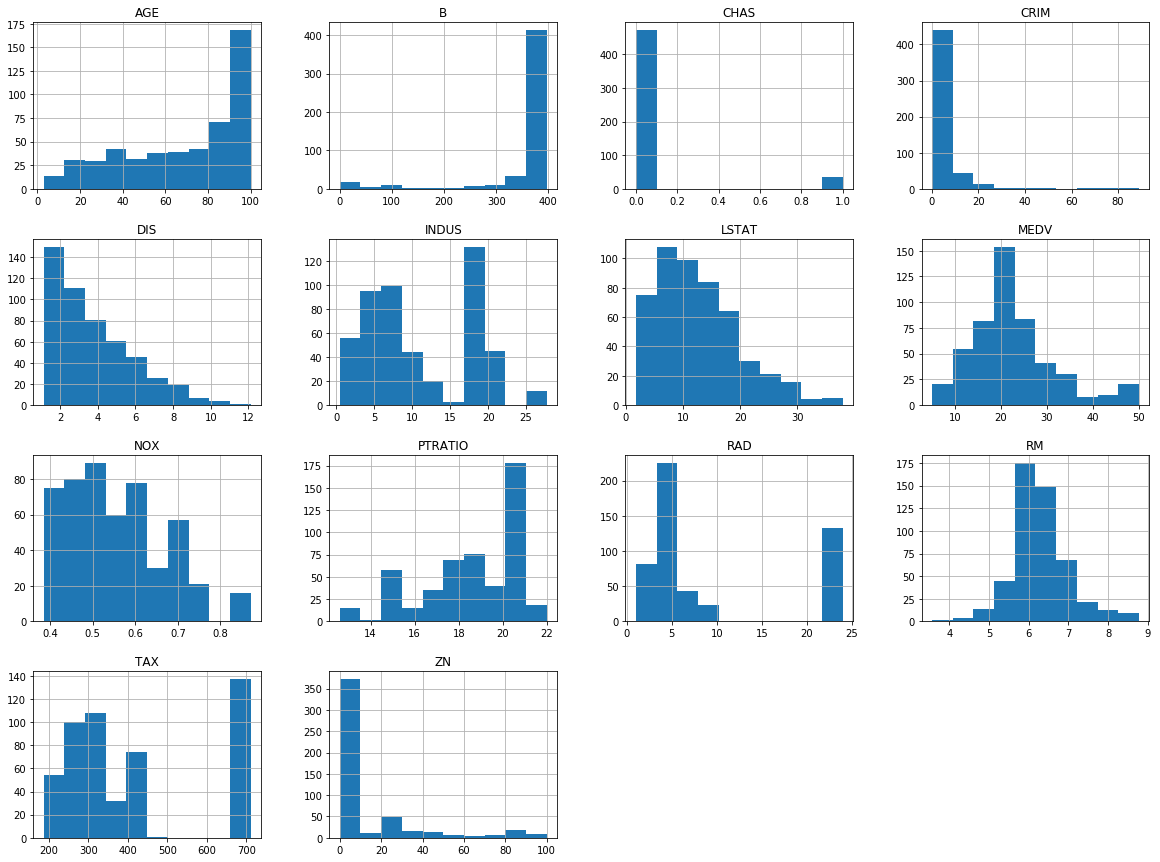

In [12]:
#histogram plot
housing.hist(figsize=(20,15))

Observation: 'CRIM' may be following Power law distribution as 80% of the points lies in 1st 20% region. 'LSTAT' is skewed towards right.'CHAS' Most of the values are 0.

In [14]:
#Checking valu count of CHAS
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

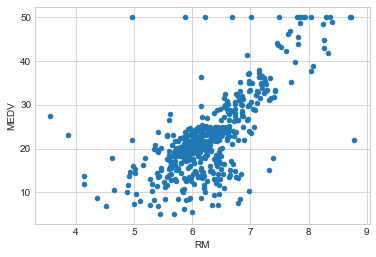

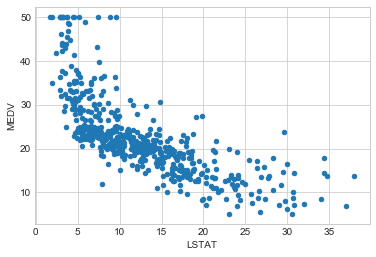

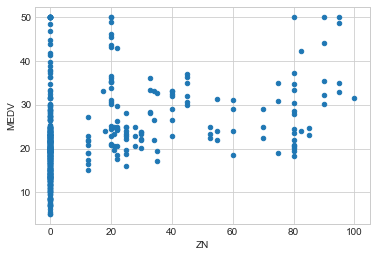

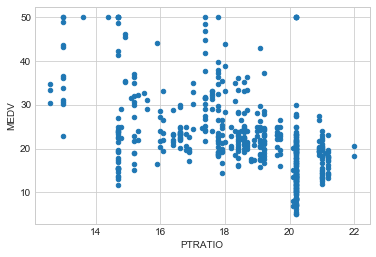

In [22]:
#plotting scatter plot RM, LSTAT, ZN and PTRATIO with MEDV
housing.plot(kind="scatter", x='RM', y='MEDV')
housing.plot(kind="scatter", x='LSTAT', y='MEDV')
housing.plot(kind="scatter", x='ZN', y='MEDV')
housing.plot(kind="scatter", x='PTRATIO', y='MEDV')

Observation: From the above scatter plots it can clearly observe the noise/ outliers present in the data and to deal with this we need to either normalize or standardized the data.

# Missing value

In [33]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median", axis=0)
imputer.fit(housing)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

Observation: All the missing values are replaced my median value and currently tere is no missing value. These changes are not saved in original data and hence we need to transform.

In [37]:
X = imputer.transform(housing)
housing_1 = pd.DataFrame(X, columns=housing.columns)

In [38]:
housing_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


# Test-train split

In [42]:
x=housing_1.drop(['MEDV'],axis=1)

In [43]:
y= housing_1['MEDV']

In [45]:
x.shape

(506, 13)

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Data Standadization

In [39]:
 from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(housing_1)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Modeling

In [47]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
from sklearn.metrics import mean_squared_error
housing_predictions = LR.predict(x_train)
mse = mean_squared_error(y_train, housing_predictions)
rmse = np.sqrt(mse)
print(rmse)

4.6545650949600015


In [54]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [55]:
from sklearn.metrics import mean_squared_error
housing_predictions = RF.predict(x_train)
mse = mean_squared_error(y_train, housing_predictions)
rmse = np.sqrt(mse)
print(rmse)

1.5521033317647532


Observation: Root mean squared error is reduced from 4.654 to 1.552 using random forest